In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/innomatcshackathon/innomatics.csv


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv('../input/innomatcshackathon/innomatics.csv',na_values='NAN')
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [21]:
data.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [22]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

#### AS we can see that there are 5 missing values in x1, 3 missing values in x2. Since our dataset is big. so we can simply remove these null value rows.

In [23]:
data.dropna(axis=0,inplace=True)
data1=data.copy()

In [24]:
data.describe()

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


Let's break the dataset into input and target variables

In [25]:
#input variable
input= data[["x1","x2"]]

#target variable
target=data.y

input

,x1,x2
0,-119.366669,1.150000e+02
1,-101.108044,9.777716e+01
2,-130.278658,1.067677e+02
3,-114.703415,1.011955e+02
4,-119.366669,1.150000e+02
...,...,...
2222,98.714112,8.964312e+01
2223,96.633331,9.100000e+01
2224,85.673940,1.038393e+02
2225,78.958862,7.860537e+01


In [26]:
def tune(input,target,model):
    
    i=1
    for train_index, test_index in kf.split(input,target):
        print('\n{} of kfold {}'.format(i,kf.n_splits)) 
        x_train,x_test=input.iloc[train_index],input.iloc[test_index]
        y_train,y_test=target.iloc[train_index],target.iloc[test_index]
        model.fit(x_train,y_train)

        score=(model.score(x_test,y_test)*100)
        print('accuracy_score',score) 
        i=i+1

In [27]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
kf=KFold(10)

model=LogisticRegression()
tune(input,target,model)



1 of kfold 10
accuracy_score 0.0

2 of kfold 10
accuracy_score 0.0

3 of kfold 10
accuracy_score 0.0

4 of kfold 10
accuracy_score 0.0

5 of kfold 10
accuracy_score 58.108108108108105

6 of kfold 10
accuracy_score 45.94594594594595

7 of kfold 10
accuracy_score 58.108108108108105

8 of kfold 10
accuracy_score 14.414414414414415

9 of kfold 10
accuracy_score 86.48648648648648

10 of kfold 10
accuracy_score 41.6289592760181


### SVM with Linear Kernal

In [28]:
from sklearn.svm import SVC

#we will use data1 as a dataset
data1=data.copy()
data1.describe()

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [29]:
#split input and target variable
#input variable
input= data1[["x1","x2"]]
#target variable
target=data1.y

In [30]:
model = SVC()
## we are calling tune function for cross validation

tune(input,target,model)


1 of kfold 10
accuracy_score 0.0

2 of kfold 10
accuracy_score 0.0

3 of kfold 10
accuracy_score 0.0

4 of kfold 10
accuracy_score 0.0

5 of kfold 10
accuracy_score 58.108108108108105

6 of kfold 10
accuracy_score 100.0

7 of kfold 10
accuracy_score 100.0

8 of kfold 10
accuracy_score 100.0

9 of kfold 10
accuracy_score 100.0

10 of kfold 10
accuracy_score 100.0


In [31]:
model = SVC(kernel='rbf')
## we are calling tune function for cross validation

tune(input,target,model)


1 of kfold 10
accuracy_score 0.0

2 of kfold 10
accuracy_score 0.0

3 of kfold 10
accuracy_score 0.0

4 of kfold 10
accuracy_score 0.0

5 of kfold 10
accuracy_score 58.108108108108105

6 of kfold 10
accuracy_score 100.0

7 of kfold 10
accuracy_score 100.0

8 of kfold 10
accuracy_score 100.0

9 of kfold 10
accuracy_score 100.0

10 of kfold 10
accuracy_score 100.0


In [32]:
## Decision Tree Classifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO   
from IPython.display import Image 
%matplotlib inline
sns.set()

In [33]:
data1.describe()

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


#splitting data into input and target

In [34]:
#split input and target variable
#input variable
input= data1[["x1","x2"]]
#target variable
target=data1.y

In [35]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [36]:
tune(input,target,model)


1 of kfold 10
accuracy_score 92.7927927927928

2 of kfold 10
accuracy_score 90.54054054054053

3 of kfold 10
accuracy_score 88.28828828828829

4 of kfold 10
accuracy_score 89.1891891891892

5 of kfold 10
accuracy_score 100.0

6 of kfold 10
accuracy_score 93.24324324324324

7 of kfold 10
accuracy_score 96.84684684684684

8 of kfold 10
accuracy_score 89.63963963963964

9 of kfold 10
accuracy_score 93.24324324324324

10 of kfold 10
accuracy_score 85.52036199095022


In [37]:
from sklearn.tree import plot_tree
f=input.columns
c=str(target.unique())
plt.style.use('dark_background')


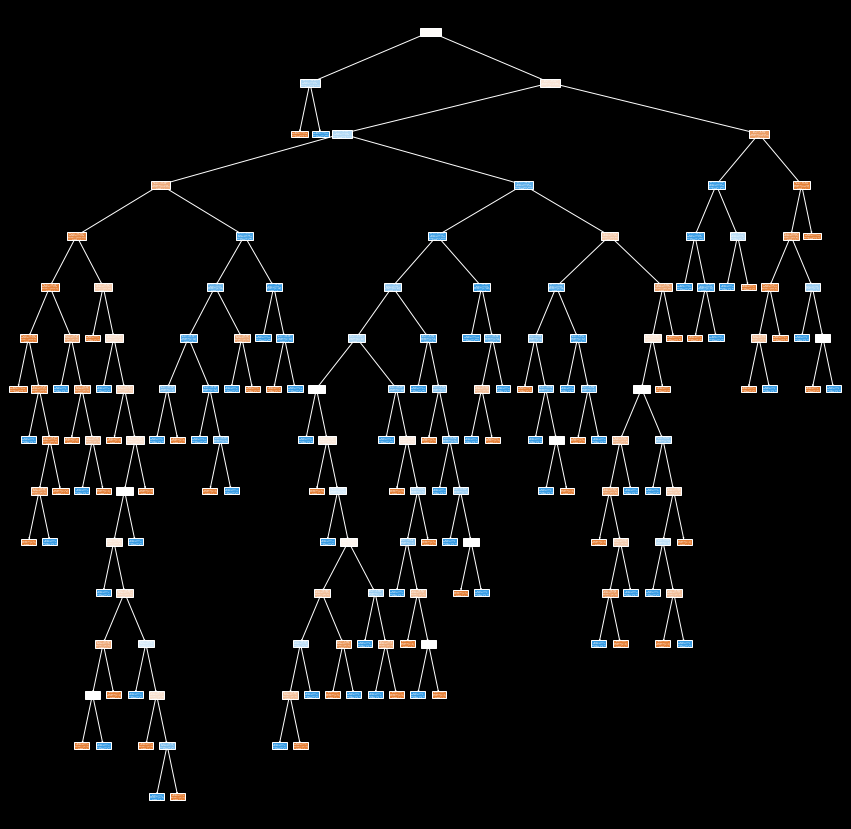

In [38]:
plt.figure(figsize=(15,15))
plot_tree(model,feature_names=f,class_names=c,filled=True)
plt.show()

In [39]:
## KNN calssifier

data.head()
#since this dataset is clean we can use it


,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [40]:
#count total no of classes 
data.groupby('y').size()

y
0    1238
1     981
dtype: int64

In [41]:
#split input and target variable
#input variable
input= data1[["x1","x2"]]
#target variable
target=data1.y

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)

In [45]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size = 0.3, random_state = 10)
# Instantiate learning model (k = 3)

for i in range(1,10):        
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)    
    score=model.score(x_test,y_test)
    print(score*100)



93.09309309309309
92.94294294294293
93.993993993994
93.84384384384384
94.14414414414415
93.993993993994
94.29429429429429
93.54354354354354
93.84384384384384


In [ ]:
### Due to timed out and some issue in my machine i'm unale to high light the comaprison study sorry for this